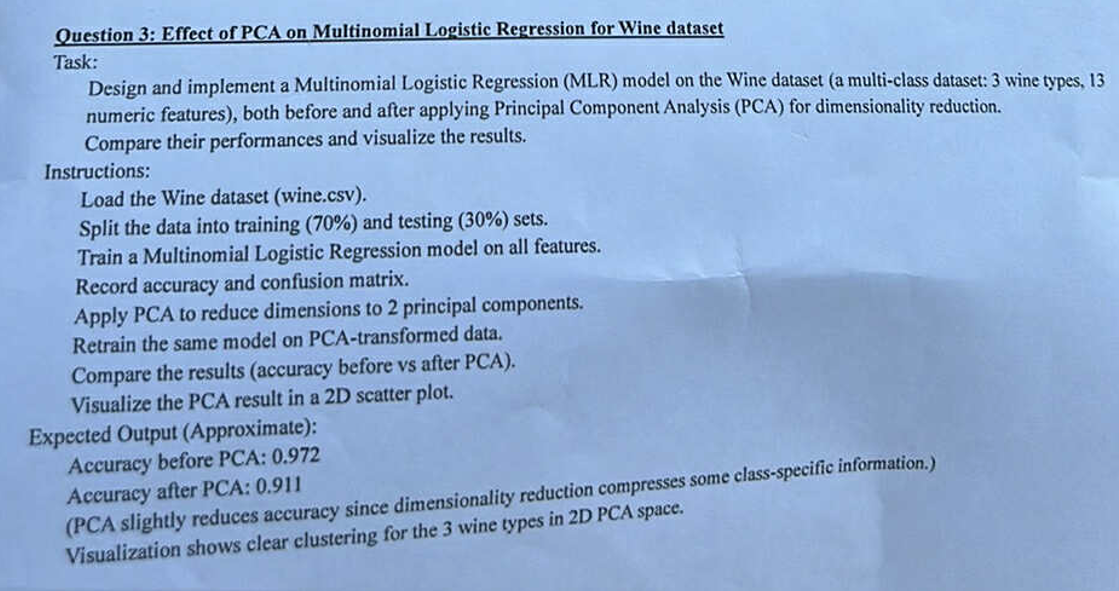

Accuracy before PCA: 0.9814814814814815


C:\Users\Israk\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


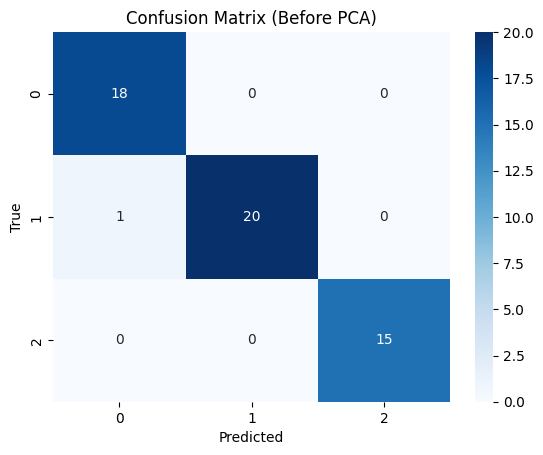

C:\Users\Israk\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy after PCA: 0.9444444444444444


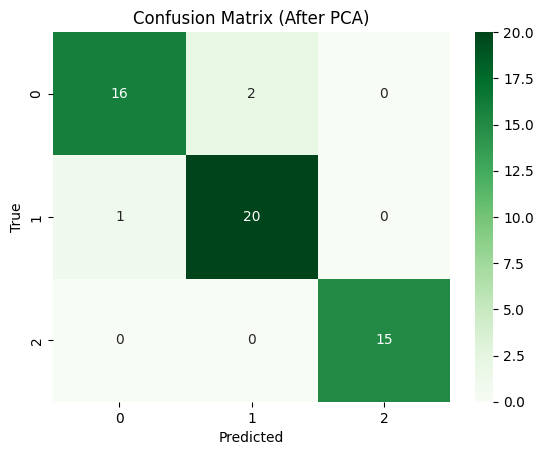

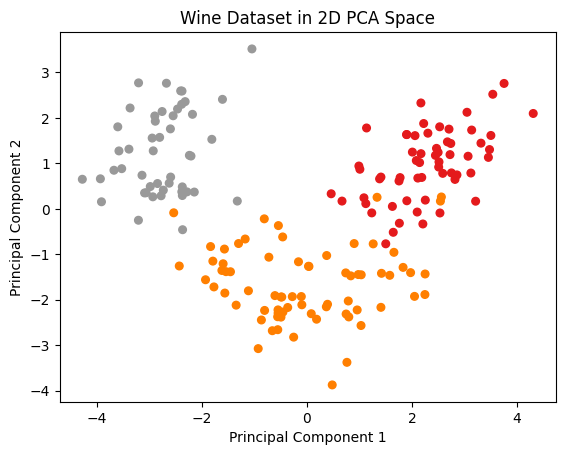

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names
target_names = wine.target_names

df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# This is scaling (standardizing) all input features so that each has mean = 0 and standard deviation = 1.
# Reason: If one feature has values in the thousands and another is between 0–1, the large-valued feature will dominate.
# Standardizing ensures all features contribute equally.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Multinomial Logistic Regression before PCA
mlr = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=2000)
mlr.fit(X_train_scaled, y_train)
y_pred = mlr.predict(X_test_scaled)

print("Accuracy before PCA:", accuracy_score(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Before PCA)')
plt.xlabel('Predicted'); plt.ylabel('True')
plt.show()

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Multinomial Logistic Regression after PCA
mlr_pca = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=2000)
mlr_pca.fit(X_train_pca, y_train)
y_pred_pca = mlr_pca.predict(X_test_pca)

print("Accuracy after PCA:", accuracy_score(y_test, y_pred_pca))

sns.heatmap(confusion_matrix(y_test, y_pred_pca), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix (After PCA)')
plt.xlabel('Predicted'); plt.ylabel('True')
plt.show()

X_scaled_full = scaler.fit_transform(X)
X_pca2 = pca.fit_transform(X_scaled_full)
plt.scatter(X_pca2[:,0], X_pca2[:,1], c=y, cmap='Set1', s=30)
plt.title("Wine Dataset in 2D PCA Space")
plt.xlabel("Principal Component 1"); plt.ylabel("Principal Component 2")
plt.show()


### Another Solution

C:\Users\Israk\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Accuracy Before PCA: 0.981

Confusion Matrix (Before PCA):
 [[18  0  0]
 [ 1 20  0]
 [ 0  0 15]]

Classification Report (Before PCA):
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.95      0.98        21
           2       1.00      1.00      1.00        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54


Accuracy After PCA: 0.944

Confusion Matrix (After PCA):
 [[16  2  0]
 [ 1 20  0]
 [ 0  0 15]]

Classification Report (After PCA):
               precision    recall  f1-score   support

           0       0.94      0.89      0.91        18
           1       0.91      0.95      0.93        21
           2       1.00      1.00      1.00        15

    accuracy                           0.94        54
   macro avg       0.95      0.95      0.95        54
weighted avg       0.95 

C:\Users\Israk\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


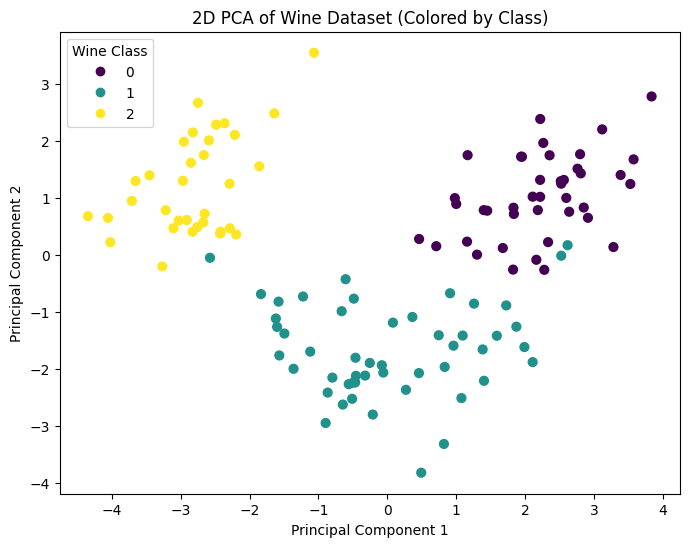

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ================================
# 1. Load the Wine Dataset
# ================================

wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names
target_names = wine.target_names

df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# ================================
# 2. Split into features and target
# ================================
X = df.drop('target', axis=1)
y = df['target']

# ================================
# 3. Train-Test Split
# ================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ================================
# 4. Feature Scaling
# ================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ================================
# 5. Train Multinomial Logistic Regression (Before PCA)
# ================================
mlr = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
mlr.fit(X_train_scaled, y_train)
y_pred = mlr.predict(X_test_scaled)

acc_before_pca = accuracy_score(y_test, y_pred)
cm_before = confusion_matrix(y_test, y_pred)

print(f"\nAccuracy Before PCA: {acc_before_pca:.3f}")
print("\nConfusion Matrix (Before PCA):\n", cm_before)
print("\nClassification Report (Before PCA):\n", classification_report(y_test, y_pred))

# ================================
# 6. Apply PCA (Reduce to 2 Components)
# ================================
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# ================================
# 7. Retrain Logistic Regression on PCA Data
# ================================
mlr_pca = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
mlr_pca.fit(X_train_pca, y_train)
y_pred_pca = mlr_pca.predict(X_test_pca)

acc_after_pca = accuracy_score(y_test, y_pred_pca)
cm_after = confusion_matrix(y_test, y_pred_pca)

print(f"\nAccuracy After PCA: {acc_after_pca:.3f}")
print("\nConfusion Matrix (After PCA):\n", cm_after)
print("\nClassification Report (After PCA):\n", classification_report(y_test, y_pred_pca))

# ================================
# 8. Compare and Visualize PCA Results
# ================================
print("\n✅ Accuracy Comparison:")
print(f"Before PCA: {acc_before_pca:.3f}")
print(f"After PCA : {acc_after_pca:.3f}")

# Visualization of 2D PCA
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train, cmap='viridis', s=40)
plt.title("2D PCA of Wine Dataset (Colored by Class)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(*scatter.legend_elements(), title="Wine Class")
plt.show()
